### Stock Market Prediction And Forecasting Using Stacked LSTM

In [4]:
### Keras and Tensorflow >2.0

In [5]:
### Data Collection
import pandas_datareader as pdr
key=""

In [8]:
df = pdr.get_data_tiingo('AAPL', api_key='11dfb33f50f81bf08437b4bbf7619d48cad950ff')

In [10]:
df.to_csv('AAPL.csv')

In [11]:
import pandas as pd

In [12]:
df=pd.read_csv('AAPL.csv')

In [13]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-07-21 00:00:00+00:00,130.75,132.92,130.32,132.85,76756427,120.489185,122.488891,120.092930,122.424384,76756427,0.0,1.0
1,AAPL,2015-07-22 00:00:00+00:00,125.22,125.50,121.99,121.99,115450607,115.393160,115.651187,112.416640,112.416640,115450607,0.0,1.0
2,AAPL,2015-07-23 00:00:00+00:00,125.16,127.09,125.06,126.20,50999452,115.337869,117.116409,115.245717,116.296253,50999452,0.0,1.0
3,AAPL,2015-07-24 00:00:00+00:00,124.50,125.74,123.90,125.32,42162332,114.729663,115.872352,114.176749,115.485313,42162332,0.0,1.0
4,AAPL,2015-07-27 00:00:00+00:00,122.77,123.61,122.12,123.09,44455540,113.135428,113.909508,112.536438,113.430315,44455540,0.0,1.0


In [14]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2020-07-13 00:00:00+00:00,381.91,399.82,381.03,389.06,47913100,381.91,399.82,381.03,389.06,47913100,0.0,1.0
1254,AAPL,2020-07-14 00:00:00+00:00,388.23,389.02,375.51,379.36,42748100,388.23,389.02,375.51,379.36,42748100,0.0,1.0
1255,AAPL,2020-07-15 00:00:00+00:00,390.90,396.99,385.96,395.96,38306900,390.90,396.99,385.96,395.96,38306900,0.0,1.0
1256,AAPL,2020-07-16 00:00:00+00:00,386.09,389.62,383.62,386.25,27645900,386.09,389.62,383.62,386.25,27645900,0.0,1.0
1257,AAPL,2020-07-17 00:00:00+00:00,385.31,388.59,383.36,387.95,23046800,385.31,388.59,383.36,387.95,23046800,0.0,1.0


In [15]:
df1=df.reset_index()['close']

In [16]:
df1

0       130.75
1       125.22
2       125.16
3       124.50
4       122.77
         ...  
1253    381.91
1254    388.23
1255    390.90
1256    386.09
1257    385.31
Name: close, Length: 1258, dtype: float64

In [17]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [18]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [19]:
import numpy as np

In [20]:
df1

0       130.75
1       125.22
2       125.16
3       124.50
4       122.77
         ...  
1253    381.91
1254    388.23
1255    390.90
1256    386.09
1257    385.31
Name: close, Length: 1258, dtype: float64

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [22]:
print(df1)

[[0.13444903]
 [0.11605004]
 [0.11585041]
 ...
 [1.        ]
 [0.98399654]
 [0.98140138]]


In [23]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [24]:
training_size,test_size

(817, 441)

In [25]:
train_data

array([[0.13444903],
       [0.11605004],
       [0.11585041],
       [0.11365451],
       [0.10789859],
       [0.10992813],
       [0.10863056],
       [0.10656774],
       [0.10300772],
       [0.09349215],
       [0.08084908],
       [0.08337769],
       [0.08247937],
       [0.08377695],
       [0.09775087],
       [0.07702289],
       [0.08284536],
       [0.08254591],
       [0.08524088],
       [0.08923343],
       [0.08703753],
       [0.08208012],
       [0.07422811],
       [0.05130423],
       [0.04252063],
       [0.04458344],
       [0.06437982],
       [0.07512643],
       [0.07635747],
       [0.07459409],
       [0.05782539],
       [0.0731967 ],
       [0.06664227],
       [0.06298243],
       [0.07309689],
       [0.0659103 ],
       [0.07396194],
       [0.07941842],
       [0.08307825],
       [0.08630556],
       [0.08673809],
       [0.07845355],
       [0.07688981],
       [0.08274554],
       [0.07672345],
       [0.0797844 ],
       [0.08204685],
       [0.081

In [26]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [27]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [28]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [29]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [30]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [31]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [32]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Train on 716 samples, validate on 340 samples
Epoch 1/100
716/716 [==============================] - 7s 9ms/sample - loss: 0.0144 - val_loss: 0.0567
Epoch 2/100
716/716 [==============================] - 2s 3ms/sample - loss: 0.0030 - val_loss: 0.0032
Epoch 3/100
716/716 [==============================] - 3s 4ms/sample - loss: 7.9363e-04 - val_loss: 0.0070
Epoch 4/100
716/716 [==============================] - 3s 4ms/sample - loss: 6.0733e-04 - val_loss: 0.0031
Epoch 5/100
716/716 [==============================] - 2s 3ms/sample - loss: 4.6898e-04 - val_loss: 0.0029
Epoch 6/100
716/716 [==============================] - 2s 3ms/sample - loss: 4.1378e-04 - val_loss: 0.0029
Epoch 7/100
716/716 [==============================] - 3s 5ms/sample - loss: 4.0463e-04 - val_loss: 0.0031
Epoch 8/100
716/716 [==============================] - 4s 5ms/sample - loss: 4.0272e-04 - val_loss: 0.0027
Epoch 9/100
716/716 [==============================] - 3s 4ms/sample - loss: 4.0772e-04 - val_loss: 0.0027

716/716 [==============================] - 3s 4ms/sample - loss: 1.8601e-04 - val_loss: 0.0015
Epoch 77/100
716/716 [==============================] - 3s 4ms/sample - loss: 2.0546e-04 - val_loss: 0.0021
Epoch 78/100
716/716 [==============================] - 3s 4ms/sample - loss: 1.8485e-04 - val_loss: 0.0011
Epoch 79/100
716/716 [==============================] - 2s 3ms/sample - loss: 1.9136e-04 - val_loss: 0.0027
Epoch 80/100
716/716 [==============================] - 3s 4ms/sample - loss: 1.9933e-04 - val_loss: 0.0012
Epoch 81/100
716/716 [==============================] - 2s 3ms/sample - loss: 1.6154e-04 - val_loss: 0.0015
Epoch 82/100
716/716 [==============================] - 2s 3ms/sample - loss: 1.5647e-04 - val_loss: 0.0013
Epoch 83/100
716/716 [==============================] - 2s 3ms/sample - loss: 1.5456e-04 - val_loss: 0.0012
Epoch 84/100
716/716 [==============================] - 3s 4ms/sample - loss: 1.7064e-04 - val_loss: 0.0014
Epoch 85/100
716/716 [===================

In [36]:
import tensorflow as tf

In [37]:
tf.__version__

'2.1.0'

In [38]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [39]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [40]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

145.57935738018736

In [41]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

249.66200771932313

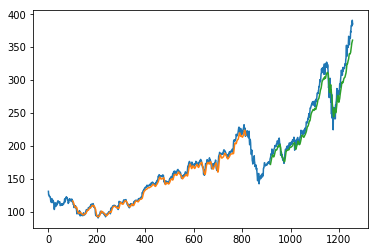

In [42]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [43]:
len(test_data)

441

In [44]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 100)

In [45]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [46]:
temp_input

[0.6731101943039659,
 0.6094623369709875,
 0.608929997338302,
 0.6936052701623637,
 0.6620308756986958,
 0.7066808623902051,
 0.6740085174341232,
 0.661066010114453,
 0.5850079850944904,
 0.6487889273356402,
 0.6158171413361726,
 0.5253194037796114,
 0.6242680330050574,
 0.5052901250998137,
 0.5407239819004526,
 0.5201290923609263,
 0.5138408304498271,
 0.46213734362523295,
 0.4459342560553634,
 0.5208277881288262,
 0.5163029012509982,
 0.5592893265903647,
 0.5236891136545117,
 0.547211871173809,
 0.5454817673675806,
 0.5009648655842428,
 0.5143398988554699,
 0.5026284269363854,
 0.5726976310886347,
 0.5625831780676073,
 0.5846752728240618,
 0.5910633484162897,
 0.6085640138408306,
 0.6544783071599682,
 0.6457612456747406,
 0.6532805429864255,
 0.6403380356667555,
 0.6208078253926006,
 0.5923276550439182,
 0.6180463135480438,
 0.6144862922544584,
 0.6409036465264841,
 0.6415690710673411,
 0.6262975778546713,
 0.6567407505988823,
 0.6769363854138942,
 0.6611990950226245,
 0.674807026883

In [47]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9002613]
101
1 day input [0.60946234 0.60893    0.69360527 0.66203088 0.70668086 0.67400852
 0.66106601 0.58500799 0.64878893 0.61581714 0.5253194  0.62426803
 0.50529013 0.54072398 0.52012909 0.51384083 0.46213734 0.44593426
 0.52082779 0.5163029  0.55928933 0.52368911 0.54721187 0.54548177
 0.50096487 0.5143399  0.50262843 0.57269763 0.56258318 0.58467527
 0.59106335 0.60856401 0.65447831 0.64576125 0.65328054 0.64033804
 0.62080783 0.59232766 0.61804631 0.61448629 0.64090365 0.64156907
 0.62629758 0.65674075 0.67693639 0.6611991  0.67480703 0.68944637
 0.69966063 0.71000799 0.7312683  0.74750466 0.73552702 0.72301703
 0.7293053  0.72321666 0.7473383  0.74128294 0.76154512 0.75362656
 0.76041389 0.75322731 0.75781874 0.75828454 0.75725313 0.77026218
 0.77521959 0.78114187 0.77182592 0.80236891 0.80889007 0.84392467
 0.87336971 0.81700825 0.82665691 0.84059755 0.8708411  0.86921081
 0.8696766  0.86298909 0.89343226 0.91891802 0.89739154 0.91329518
 0.87599814 0.90311419 0.9131621  

9 day output [[0.7734943]]
10 day input [0.61581714 0.5253194  0.62426803 0.50529013 0.54072398 0.52012909
 0.51384083 0.46213734 0.44593426 0.52082779 0.5163029  0.55928933
 0.52368911 0.54721187 0.54548177 0.50096487 0.5143399  0.50262843
 0.57269763 0.56258318 0.58467527 0.59106335 0.60856401 0.65447831
 0.64576125 0.65328054 0.64033804 0.62080783 0.59232766 0.61804631
 0.61448629 0.64090365 0.64156907 0.62629758 0.65674075 0.67693639
 0.6611991  0.67480703 0.68944637 0.69966063 0.71000799 0.7312683
 0.74750466 0.73552702 0.72301703 0.7293053  0.72321666 0.7473383
 0.74128294 0.76154512 0.75362656 0.76041389 0.75322731 0.75781874
 0.75828454 0.75725313 0.77026218 0.77521959 0.78114187 0.77182592
 0.80236891 0.80889007 0.84392467 0.87336971 0.81700825 0.82665691
 0.84059755 0.8708411  0.86921081 0.8696766  0.86298909 0.89343226
 0.91891802 0.89739154 0.91329518 0.87599814 0.90311419 0.9131621
 0.91086638 0.91086638 0.94327256 0.9394131  0.96829252 0.973749
 0.97597817 0.97008917 0.99

19 day output [[0.7402516]]
20 day input [0.5163029  0.55928933 0.52368911 0.54721187 0.54548177 0.50096487
 0.5143399  0.50262843 0.57269763 0.56258318 0.58467527 0.59106335
 0.60856401 0.65447831 0.64576125 0.65328054 0.64033804 0.62080783
 0.59232766 0.61804631 0.61448629 0.64090365 0.64156907 0.62629758
 0.65674075 0.67693639 0.6611991  0.67480703 0.68944637 0.69966063
 0.71000799 0.7312683  0.74750466 0.73552702 0.72301703 0.7293053
 0.72321666 0.7473383  0.74128294 0.76154512 0.75362656 0.76041389
 0.75322731 0.75781874 0.75828454 0.75725313 0.77026218 0.77521959
 0.78114187 0.77182592 0.80236891 0.80889007 0.84392467 0.87336971
 0.81700825 0.82665691 0.84059755 0.8708411  0.86921081 0.8696766
 0.86298909 0.89343226 0.91891802 0.89739154 0.91329518 0.87599814
 0.90311419 0.9131621  0.91086638 0.91086638 0.94327256 0.9394131
 0.96829252 0.973749   0.97597817 0.97008917 0.99111658 1.
 0.98399654 0.98140138 0.90026128 0.88455868 0.86326659 0.84190458
 0.82289839 0.80723917 0.7948064

29 day output [[0.68623406]]
[[0.9002612829208374], [0.8845586776733398], [0.8632665872573853], [0.8419045805931091], [0.8228983879089355], [0.8072391748428345], [0.7948064208030701], [0.7853703498840332], [0.7783957719802856], [0.773494303226471], [0.7697902321815491], [0.7669680714607239], [0.7647672891616821], [0.7622870206832886], [0.7598671317100525], [0.756883442401886], [0.753402590751648], [0.7493605017662048], [0.7449779510498047], [0.7402516007423401], [0.7349774241447449], [0.7294965386390686], [0.7237180471420288], [0.7179931402206421], [0.7121968865394592], [0.7064853310585022], [0.7011054754257202], [0.6959154605865479], [0.691051721572876], [0.6862340569496155]]


In [72]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [68]:
import matplotlib.pyplot as plt

In [65]:
len(df1)

1258

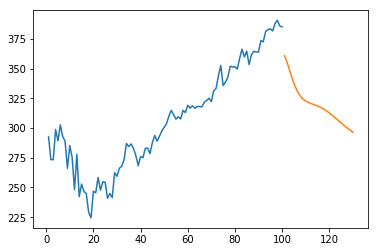

In [73]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

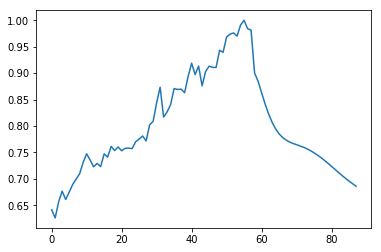

In [74]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [53]:
df3=scaler.inverse_transform(df3).tolist()

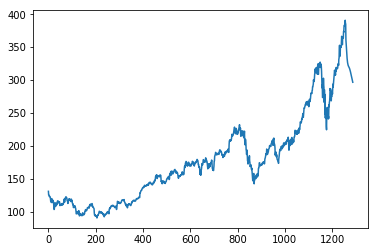

In [54]:
plt.plot(df3)